In [2]:
import numpy as np

## 1.创建一个3*3的多维数组

In [3]:
a = np.array([[12, 23, 23],
         [12, 34, 33],
         [54, 13, 34]])
a

array([[12, 23, 23],
       [12, 34, 33],
       [54, 13, 34]])

## 2.对比python列表和numpy数组的效率

**numpy比python列表快的原因:**

- python列表可以存放不同类型的数据(numpy不能),存的是数据的地址
- numpy牺牲了其通用性换取性能
- numpy支持并行化运算(充分调用计算机多核)
- numpy使用C语言编写,编译成机器码,解除了python的GIL锁的限制

In [4]:
import random

python_list = [random.random() for i in range(10000)]
numpy_array = np.array(python_list)

# 对不同的数据类型进行求和并计算各自的时间
%timeit sum(python_list)
%timeit numpy_array.sum()

46.2 µs ± 1.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
7.7 µs ± 342 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## 3.ndarray的属性

In [5]:
a.shape # 数组的形状

(3, 3)

In [6]:
a.size  # 数组中元素的数量

9

In [7]:
a.ndim  # 数组的维数

2

In [8]:
a.itemsize  # 一个数组元素的占用大小(字节)

4

In [9]:
a.dtype  # 数组元素的类型

dtype('int32')

## 4. 数组的类型(numpy.dtype)

常见的如下:
- np.bool, 一个字节存储的布尔类型(True或者False), 简写为'b'
- np.uint16, 无符号整数, 0至65535, 简写为'u2'
- np.int32, 整数, -2^32至2^32-1, 简写为'i4'
- np.float32, 单精度浮点数, 简写为'f4'
- np.complex64, 复数,分别用两个32位浮点数表示实部和虚部, 简写为''

- np.object_, python对象, 简写为'O'
- np.string_, 字符串, 简写为'S'
- np.unicode_, unicode类型, 简写为'U'

In [10]:
# 创建数组的时候指定数据类型
a = np.array([[1, 2, 3], [2, 4, 6]], dtype=np.int16)
print(a)
a.dtype

[[1 2 3]
 [2 4 6]]


dtype('int16')

## 5. 数组的基本操作

#### 5.1生成全为0或全为1的数组

In [11]:
# 生成全为0的数组
zeros = np.zeros([4, 4])
zeros

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [12]:
# 生成全为1的数组
ones = np.ones([4, 4])
ones

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

#### 5.2生成固定范围的数组
**np.linspace(start, stop, num, endpoint, retstep, dtype)**

- start 序列的起始值
- stop 序列的终止值
- endpoint为true，则该值包含于序列中
- num 要生成的等间隔样例数量，默认为50
- endpoint 序列中是否包含stop值，默认为True
- retstep 如果为true，返回样例，以及连续数字之间的步长
- dtype 输出ndarray的数据类型


**np.arange(start, stop, step, dtype)**

- start 序列的起始值
- stop 序列的终止值
- step 间隔值
- dtype 数据类型

In [13]:
# 生成指定范围和指定数量的数组
a = np.linspace(0, 50, 50, endpoint=False, dtype=np.int8)
print(a)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [14]:
# 生成指定范围和指定间隔的数组
a = np.arange(0, 20, 3)
print(a)

[ 0  3  6  9 12 15 18]


#### 5.3生成随机数组
1. **np.random.rand(d0, d1, ..., dn)**

    返回[0.0, 1.0]之间的一组均匀分布的数, 可以指定数量.

2. **np.random.uniform(low, high, size)**

    从一个均匀分布[low,high)中随机采样，注意定义域是左闭右开，即包含low，不包含high.

    - low: 采样下界，float类型，默认值为0；
    - high: 采样上界，float类型，默认值为1；
    - size: 输出样本数目，为int或元组(tuple)类型，例如，size=(m,n,k), 则输出mnk个样本，缺省时输出1个值。


3. **np.random.randn(d0, d1, .., dn)**

    从标准正态分布中返回一个或多个样本值.

4. **np.random.normal(loc, scale, size)**
    - loc：float, 此概率分布的均值（对应着整个分布的中心centre）
    - scale：float, 此概率分布的标准差（对应于分布的宽度，scale越大越矮胖，scale越小，越瘦高）
    - size：int or tuple of ints, 输出的shape，默认为None，只输出一个值

5. **np.random.randint()**
    

In [15]:

a = np.random.uniform(-1, 1, 100000)  # -1至1之间生成均匀分布的指定数量的一维数组

import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3), dpi=100)
plt.hist(a, bins=100)  # 创建一个直方图,并指定组数为100
plt.show()

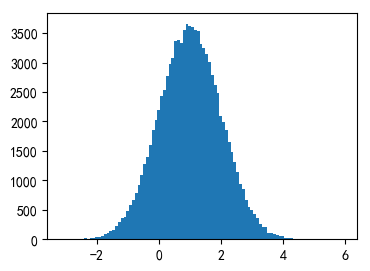

In [16]:
a = np.random.normal(1, 1, 100000)  # 生成100000个数值, 其均值为1, 标准差为1

import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3), dpi=100)
plt.hist(a, bins=100)
plt.show()

**创建符合正态分布的8支股票10天的涨幅数据**

In [17]:
stock_change = np.random.normal(0, 1, (8, 10))  # 生成8 * 10的数据(8个股票的10天涨跌幅)
stock_change

array([[-1.51071102, -1.36936024,  0.55694841, -0.20575934, -0.09324103,
        -1.99472206,  0.31168829,  1.78759492, -0.00632116, -0.45681451],
       [ 0.01758019,  0.16156367,  0.85685861, -1.09281586, -1.55249727,
         2.1429633 ,  0.27954998, -0.27899284,  1.48244412, -1.17277055],
       [ 0.12600475,  0.32274608,  1.34435922, -0.31759477,  0.96682537,
         1.42636143, -0.04854809,  0.73437288,  0.47656736,  2.43022751],
       [-0.13824032,  0.02117672, -0.66105999,  0.28058603,  0.61384453,
        -0.4402858 , -1.12127357,  0.58564511, -1.82240927,  0.34940699],
       [-1.66710949,  0.3424013 , -0.41304379, -0.20482929,  0.25796597,
         0.80247632,  0.94281792,  0.55335991, -1.70455389, -1.48247077],
       [ 1.88535557,  0.6650327 , -0.83948646, -0.26989504, -1.17903328,
        -0.07452791, -0.23354159, -0.04800183, -0.40335668, -1.04830611],
       [ 1.22954709,  1.01093354, -0.4699364 ,  0.78883776,  0.80613997,
         0.51679347, -0.57349223, -0.39183405

#### 5.4数组的索引和切片

In [18]:
# 获取第一个股票的前3个交易日的涨跌幅数据
stock_change[0, 0:3]

array([-1.51071102, -1.36936024,  0.55694841])

In [21]:
# 多维数组的切片
a1 = np.array([
    [
        [1, 2, 3],
        [4, 5, 6]
    ],
    [
        [11, 22, 33],
        [44, 55, 66]
    ]
])  # 3维数组

print(a1[0, 0, 0])  # 获取0行0列0纵的数据
print(a1[0, 0, 1:3])

1
[2 3]


#### 5.5数组的形状修改

**ndarray.reshape(shape[,order])**

直接将数组转换为特定的形状, 但是不会将行列进行转化

**ndarray.T**

数组的转置

**ndarray.resize(new_shape[,refcheck])**

改变数组的形状和大小

In [24]:
stock_change.reshape([10, 8])  # 将股票数据股票行和日期列颠倒过来

array([[-1.51071102, -1.36936024,  0.55694841, -0.20575934, -0.09324103,
        -1.99472206,  0.31168829,  1.78759492],
       [-0.00632116, -0.45681451,  0.01758019,  0.16156367,  0.85685861,
        -1.09281586, -1.55249727,  2.1429633 ],
       [ 0.27954998, -0.27899284,  1.48244412, -1.17277055,  0.12600475,
         0.32274608,  1.34435922, -0.31759477],
       [ 0.96682537,  1.42636143, -0.04854809,  0.73437288,  0.47656736,
         2.43022751, -0.13824032,  0.02117672],
       [-0.66105999,  0.28058603,  0.61384453, -0.4402858 , -1.12127357,
         0.58564511, -1.82240927,  0.34940699],
       [-1.66710949,  0.3424013 , -0.41304379, -0.20482929,  0.25796597,
         0.80247632,  0.94281792,  0.55335991],
       [-1.70455389, -1.48247077,  1.88535557,  0.6650327 , -0.83948646,
        -0.26989504, -1.17903328, -0.07452791],
       [-0.23354159, -0.04800183, -0.40335668, -1.04830611,  1.22954709,
         1.01093354, -0.4699364 ,  0.78883776],
       [ 0.80613997,  0.51679347

In [25]:
a1 = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

a1.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [31]:
a1.resize([1, 6])
a1

array([[1, 2, 3, 4, 5, 6]])

#### 5.6 数组类型修改

**ndarray.astype(type)**

将数组转换为新的数据类型

In [34]:
stock_change.astype(np.int32)

array([[-1, -1,  0,  0,  0, -1,  0,  1,  0,  0],
       [ 0,  0,  0, -1, -1,  2,  0,  0,  1, -1],
       [ 0,  0,  1,  0,  0,  1,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, -1,  0, -1,  0],
       [-1,  0,  0,  0,  0,  0,  0,  0, -1, -1],
       [ 1,  0,  0,  0, -1,  0,  0,  0,  0, -1],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  0, -1,  0,  1,  0, -2,  0,  0]])

#### 5.7 数组的去重

**np.unique(ndarray)**

或者**ndarray.unique**

In [36]:
a1 = np.array([
    [1, 2, 3, 4],
    [2, 3, 4, 5]
])
np.unique(a1)

array([1, 2, 3, 4, 5])

## 6. ndarray运算

#### 6.1逻辑运算

**通用判断函数**

np.all()

**三元运算符, 可将多种条件结合**

配合逻辑与np.logical_and()和逻辑或np.logical_or()

np.where()

In [39]:
stock_change = np.random.normal(0, 1, (8, 10))
# stock_change = stock_change[0:5, 0:5]  # 可以索引部分数据

# 逻辑判断,涨跌幅大于0.5为True, 小于0.5为False
stock_change > 0.5

array([[False, False,  True,  True, False, False, False, False, False,
        False],
       [False, False,  True,  True, False, False, False, False, False,
        False],
       [False, False,  True, False, False,  True, False, False, False,
        False],
       [False,  True,  True, False, False,  True, False, False, False,
        False],
       [ True, False,  True, False, False, False, False,  True, False,
         True],
       [False, False, False, False,  True, False, False,  True,  True,
        False],
       [ True, False, False, False,  True, False,  True, False, False,
         True],
       [ True,  True,  True, False, False,  True,  True, False, False,
        False]])

In [42]:
np.all(stock_change[0:2, 0:5] > 0)  # 判断前两支股票是否前5天均为涨

False

In [43]:
a1 = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])

np.where(np.logical_and(a1 > 2, a1 < 5), 1, 0)  # 将a1中满足 2<a1<5 的换为1, 否则换为0

array([[0, 0, 1, 1],
       [0, 0, 0, 0]])

In [46]:
np.where(np.logical_or(a1 > 5, a1 < 2), 1, 0)  # 将a1中满足 5<a1或a1<2 的换为1, 否则换为0

array([[1, 0, 0, 0],
       [0, 1, 1, 1]])

#### 6.2 统计运算

- min(a[, axis, out, keepdims])

    返回数组中的最小值
    
- max(a[, axis, out, keepdims])

    返回数组中的最大值
    
- median(a[, axis, out, overwrite_input, keepdims])

    返回数组的中位数
    
- mean(a[, axis, dtype, out, keepdims])

    返回数组的算术平均数
    
- std(a[, axis, dtype, out, ddof, keepdims])

    返回数组的标准差(波动程度)
    
- var(a[, axis, dtype, out, ddof, keepdims])

    返回数组的方差(波动程度)
    
- np.argmax(temp, axis=)

- np.argmin(temp, axis=)

In [50]:
print('stock_change的最小值为: ', stock_change.min())
print('stock_change的最大值为: ', stock_change.max())
print('stock_change的中位数为: ', np.median(stock_change))
print('stock_change的算术平均数为: ', stock_change.mean())
print('stock_change的标准差为: ', stock_change.std())
print('stock_change的方差为: ', stock_change.var())

stock_change的最小值为:  -2.2042818045932213
stock_change的最大值为:  2.626715669000686
stock_change的中位数为:  -0.2645665114466043
stock_change的算术平均数为:  -0.05752774178417329
stock_change的标准差为:  1.087135869870836
stock_change的方差为:  1.1818643995598193


In [57]:
# 统计具体的哪一支股票在某个交易日涨幅最大或最小
print('股票数据为: ', stock_change)
print('所有股票中涨幅最大的天数为第 {} 天 '.format(np.argmax(stock_change, axis=1) + 1))

股票数据为:  [[-1.77573109 -0.57601     1.13843719  1.82724692 -0.1677857  -0.21901486
  -0.31011816 -0.43954745 -0.79703526 -0.35904632]
 [-1.78028897 -0.46264011  0.74640046  1.16998381  0.17024759 -0.59807098
  -1.75044735 -1.82950437 -0.40613151 -1.60966157]
 [-0.62196774 -0.47901944  1.77625881 -1.12372567  0.11362925  1.41757105
  -0.67044862 -0.405515    0.32518735 -0.66278702]
 [ 0.48849715  1.19440066  1.68268588 -0.38584126 -0.15375107  0.89702376
  -0.96670558 -0.87843182  0.03430074 -0.95430174]
 [ 2.08413292  0.26196714  1.26064614  0.39875463 -1.7200321  -0.35706
  -1.62087636  0.93102677 -0.08982693  1.07364247]
 [-1.47888801  0.42208587 -0.07949521 -1.12237377  1.8965788  -0.8106739
  -1.28896765  0.51258155  0.6430801  -0.54465387]
 [ 2.32201257 -2.2042818  -0.44245781 -0.61589455  0.80388208 -0.88873825
   0.82542189 -0.49816997 -1.58284614  0.94024679]
 [ 0.75544451  0.50091212  2.62671567 -0.55526718  0.03922951  0.77576278
   1.67569207 -0.08350454 -0.91015093 -1.056218

## 7. 数组间的运算

#### 7.1数组与数的运算

In [64]:
a1 = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10]
])

a1 + 1

array([[ 2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11]])

In [65]:
a1 * 2

array([[ 2,  4,  6,  8, 10],
       [12, 14, 16, 18, 20]])

In [66]:
a1 / 2

array([[0.5, 1. , 1.5, 2. , 2.5],
       [3. , 3.5, 4. , 4.5, 5. ]])

#### 7.2数组与数组的运算

**需要满足矩阵的运算规则**

- np.mat()

    将数组转换为矩阵

- np.matmul()
    
    数组之间的乘法
    
- np.dot()

    数组之间的乘法

In [70]:
# 根据学生的平时成绩和期末成绩计算根据权重计算总的成绩
scores = np.array([
    [82, 80],
    [80, 86],
    [85, 78],
    [90, 90],
    [86, 82],
    [82, 90],
    [78, 80],
    [92, 94]
])  # 8位同学的成绩
print(np.mat(scores))  # 将数组转换为矩阵
rate = np.array([[0.7],[0.3]])  # 计算权重

np.matmul(scores, rate)  # 数组之间的乘法

[[82 80]
 [80 86]
 [85 78]
 [90 90]
 [86 82]
 [82 90]
 [78 80]
 [92 94]]


array([[81.4],
       [81.8],
       [82.9],
       [90. ],
       [84.8],
       [84.4],
       [78.6],
       [92.6]])

#### 7.3数组合并与分割

**合并**

- numpy.concatenate((a1, a2, ...), axis=0)

    类似于将数组后面添加一行或列,但是需要注意两者的纬度需要相同

- numpy.hstack(tup) 
    
    Stack arrays in sequence horizontally (column wise).
    
    按照顺序堆栈数组, 以列的方式
    
    此处的两个数组的行列都得相同
    
- numpy.vstack(tup) 
    
    Stack arrays in sequence vertically (row wise).
    
    按照顺序堆栈数组, 以行的方式

In [8]:
import numpy as np

a1 = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [11, 22, 33]
])

b1 = np.array([
    [7, 8, 9]
])

np.concatenate((a1, b1), axis=0)  # 将两个数组合并,以增加行的方式

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [11, 22, 33],
       [ 7,  8,  9]])

In [10]:
np.concatenate((a1, b1.T), axis=1)  # 将两个数组合并,以增加列的方式

array([[ 1,  2,  3,  7],
       [ 4,  5,  6,  8],
       [11, 22, 33,  9]])

In [13]:
a1 = np.array([[1], [2], [3]])
b1 = np.array([[11], [22], [33]])

np.hstack((a1, b1))  # 注意此处合并方式的差异

array([[ 1, 11],
       [ 2, 22],
       [ 3, 33]])

In [14]:
np.vstack((a1, b1))

array([[ 1],
       [ 2],
       [ 3],
       [11],
       [22],
       [33]])

**分割**

- numpy.split(ary, indices_or_sections, axis=0) 

    Split an array into multiple sub-arrays.
    
    将一个数组分割为多个子数组

In [18]:
a1 = np.arange(9, dtype=np.int64)  # 随机生成一个数组
np.split(a1, 3)  # 将a1分割为3个子数组

[array([0, 1, 2], dtype=int64),
 array([3, 4, 5], dtype=int64),
 array([6, 7, 8], dtype=int64)]

In [19]:
np.split(a1, [2, 5])  # 指明两个分割的位置进行分割

[array([0, 1], dtype=int64),
 array([2, 3, 4], dtype=int64),
 array([5, 6, 7, 8], dtype=int64)]

## 8. IO操作和数据处理

- genfromtxt(fname[, dtype, comments, ...])

    Load data from a text file, with missing values handled as specified.
    
    从文件中读取数据,当出现缺失值时,会由 NAN 代替

**numpy并不是太适合此类操作, 会尽量由 pandas 代替**

In [23]:
# 读取csv格式文件,需要说明分隔符为 , 
np_test_file = np.genfromtxt('./data/np_test.csv', delimiter=',')
np_test_file

array([[nan, nan, nan],
       [ 1., 90., 95.],
       [ 2., 85., 70.],
       [ 3., 90., 80.]])